# Title

## Copyright (c) 2018, Faststream Technologies

## Author: Sudhanva Narayana

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import keras
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

df = pd.read_csv('../data/home_final.csv')

X = df.iloc[:, [0, 3, 4, 5, 6, 7, 9, 10]].values
y = df.iloc[:, 11].values

# Encoding categorical data
labelencoder_X_0 = LabelEncoder()
X[:, 0] = labelencoder_X_0.fit_transform(X[:, 0])
labelencoder_X_1 = LabelEncoder()
X[:, 1] = labelencoder_X_1.fit_transform(X[:, 1])
labelencoder_X_2 = LabelEncoder()
X[:, 2] = labelencoder_X_2.fit_transform(X[:, 2])
labelencoder_X_4 = LabelEncoder()
X[:, 4] = labelencoder_X_4.fit_transform(X[:, 4])
labelencoder_X_5 = LabelEncoder()
X[:, 5] = labelencoder_X_5.fit_transform(X[:, 5])

onehotencoder = OneHotEncoder(categorical_features=[0, 1, 2, 4, 5])
hot_X = onehotencoder.fit_transform(X).toarray()

columns = df.columns
dummies = []
dummies_sum = 0
categories = [0, 1, 2, 4, 5]

for category in categories:
    dummies_sum += category * (df.iloc[:, category].unique().size)
    dummies.append(dummies_sum)
    
# Removing dummy variables
hot_X = np.delete(hot_X, dummies, 1)

X_train, X_test, y_train, y_test = train_test_split(hot_X, y, test_size=0.25, random_state=0)

sc_X = StandardScaler()
X_train = sc_X.fit_transform(X_train)
X_test = sc_X.transform(X_test)

Using TensorFlow backend.
C:\Users\Sudhanva\Anaconda3\envs\tf\lib\site-packages\ipykernel_launcher.py:52: DeprecationWarning: in the future out of bounds indices will raise an error instead of being ignored by `numpy.delete`.


### Classifiers

In [2]:
classifiers = {}

### KNN 

In [3]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['knn'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.5591397849462365


### Decision Tree 

In [4]:
classifier = DecisionTreeClassifier(criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['desicion_tree'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.934715821812596


### Kernal SVM 

In [5]:
classifier = SVC(kernel='rbf', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['kernal_svm'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.620583717357911


### Logistic Regression 

In [6]:
classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['logistic_regression'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.6666666666666666


### Random Forest 

In [7]:
classifier = RandomForestClassifier(n_estimators=10, criterion='entropy', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['random_forest'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.9116743471582182


### Support Vector Machines 

In [8]:
classifier = SVC(kernel='linear', random_state=0)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

classifiers['svm'] = classifier.score(X_test, y_test)
print(classifier.score(X_test, y_test))

0.6490015360983102


### Artificial Neural Networks

In [9]:
classifier = Sequential()

# Adding the input layer and the first hidden layer
layer_info = Dense(activation='relu', input_dim=134, units=65, kernel_initializer='uniform')
classifier.add(layer_info)

# Adding second hidden layer
layer_info = Dense(activation='relu', units=65, kernel_initializer='uniform')
classifier.add(layer_info)

# Adding output layer
layer_info = Dense(activation='sigmoid', units=1, kernel_initializer='uniform')
classifier.add(layer_info)

# Compiling the ANN
classifier.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Fitting the ANN to the training set
with tf.device('/GPU:0'):
    classifier.fit(X_train, y_train, batch_size=100, epochs=100)   
    
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

score, acc = classifier.evaluate(X_test, y_test,
                            batch_size=100)

classifiers['ann'] = acc

Epoch 1/100
3906/3906 [==============================] - 2s 590us/step - loss: 0.6928 - acc: 0.5131
Epoch 2/100
3906/3906 [==============================] - 0s 32us/step - loss: 0.6837 - acc: 0.5891
Epoch 3/100
3906/3906 [==============================] - 0s 32us/step - loss: 0.6487 - acc: 0.6329
Epoch 4/100
3906/3906 [==============================] - 0s 32us/step - loss: 0.5920 - acc: 0.6772
Epoch 5/100
3906/3906 [==============================] - 0s 34us/step - loss: 0.5206 - acc: 0.7407
Epoch 6/100
3906/3906 [==============================] - 0s 32us/step - loss: 0.4350 - acc: 0.7998
Epoch 7/100
3906/3906 [==============================] - 0s 32us/step - loss: 0.3685 - acc: 0.8349
Epoch 8/100
3906/3906 [==============================] - 0s 31us/step - loss: 0.3106 - acc: 0.8669
Epoch 9/100
3906/3906 [==============================] - 0s 32us/step - loss: 0.2698 - acc: 0.8886
Epoch 10/100
3906/3906 [==============================] - 0s 32us/step - loss: 0.2216 - acc: 0.9142
Epoch 11

In [10]:
print(classifiers)

{'knn': 0.5591397849462365, 'desicion_tree': 0.934715821812596, 'kernal_svm': 0.620583717357911, 'logistic_regression': 0.6666666666666666, 'random_forest': 0.9116743471582182, 'svm': 0.6490015360983102, 'ann': 0.7311827995443857}


In [11]:
values = list(classifiers.values())
labels = list(classifiers.keys())

values =  [round(i * 100, 2) for i in values]
# print(values)
# print(labels)

index = np.arange(len(labels))

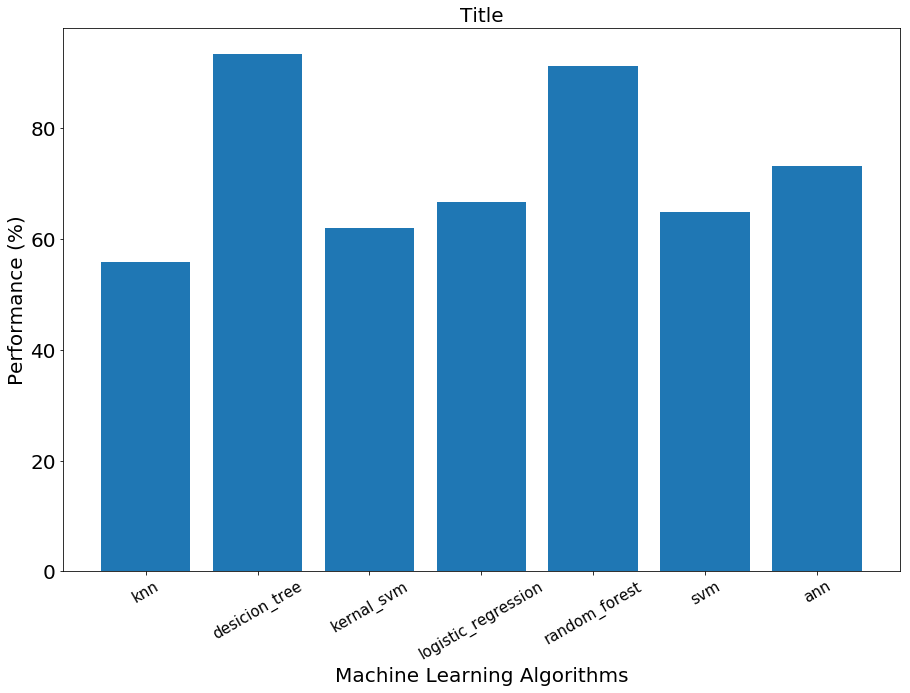

In [12]:
plt.figure(figsize=(15,10))
plt.bar(index, values)
plt.xlabel('Machine Learning Algorithms', fontsize=20)
plt.ylabel('Performance (%)', fontsize=20)
plt.xticks(index, labels, rotation=30, fontsize=15)
plt.yticks(fontsize=20)
plt.title('Title', fontsize=20)
plt.show()